In [29]:
import pandas as pd
import sqlite3
df = pd.read_csv('/Users/tvvr/Downloads/Cleaned_Consumer_Reviews2.csv')
df.head()
table_name = 'flat'

conn = sqlite3.connect('finalproject')

def check_connection(database_name):
    try:
        # Connect to the database
        conn = sqlite3.connect(database_name)

        # Create a cursor object to execute SQL commands
        cursor = conn.cursor()

        # Execute a simple SQL command to test the connection
        cursor.execute('SELECT 1')

        # Fetch the result (not necessary in this case)
        result = cursor.fetchone()

        # Commit the changes and close the cursor and connection
        conn.commit()
        cursor.close()
        conn.close()

        # If everything went well, return True
        return True

    except sqlite3.Error as e:
        # If an exception occurs, print the error message and return False
        print(f"SQLite error: {e}")
        return False

database_name = 'finalproject'
if check_connection(database_name):
    print(f"Connection to {database_name} successful.")
else:
    print(f"Connection to {database_name} failed.")

cursor=conn.cursor()


cursor.execute ("Create table if not Exists flat (ID text, Product_Name text, Product_ID text, Brand text, Categories text, keys text, Manufacturer text\
Reviews_Date TEXT, Reviews_DateAdded TEXT, Reviews_DidPurchase text, Reviews_DoRecommend, text, Reviews_ID text, Reviews_NumHelpful integer, Reviews_Rating integer, Reviews_SourceURLs text, \
Reviews_Text text, Reviews_Title text, Reviews_UserCity text, Reviews_UserProvince text, Reviews_Username text, Reviews_Year integer,\
Reviews_Month integer, Reviews_Day integer, Reviews_Hour integer, Reviews_Minute integer, Reviews_Second integer, Reviews_YearAdded integer,\
Reviews_MonthAdded integer, Reviews_DayAdded integer, Reviews_HourAdded integer, Reviews_MinuteAdded integer, Reviews_SecondAdded integer,\
Reviews_DateAdded_Only integer,primary key (Product_ID))")

conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

Connection to finalproject successful.


In [30]:
conn = sqlite3.connect('finalproject')
cursor=conn.cursor()

result = cursor.execute("SELECT count(*) FROM flat")
for row in result:
    print(row)

(23,)


In [31]:
cursor.execute ("Create table if not Exists web (Rating text,verified text, Reviewer_ID text, Product_ID text, Reviewer_Name text,\
Review_Text text, Review_Summary text, Review_Date text, primary key (Product_ID))")

In [32]:
df_web = pd.read_csv('/Users/tvvr/Downloads/web_Consumer_Reviews.csv')
conn.execute(query)
web_table_name = 'web'
df_web.to_sql(web_table_name,conn,if_exists='replace',index=False)


3087

In [33]:
cursor.execute ("Create table if not Exists api (Product_ID	text, Review_id text, Review_title text, Review_comment text,\
Review_star_rating integer, Review_author text, Review_date text, Is_verified_purchase text, primary key (Product_ID))")

In [34]:
df_api = pd.read_csv('/Users/tvvr/Downloads/clean_reviews_data.csv')
conn.execute(query)
api_table_name = 'api'
df_api.to_sql(api_table_name,conn,if_exists='replace',index=False)

60

In [35]:
# Query the data from the tables
query_flat = "SELECT * FROM flat;"
query_web = "SELECT * FROM web;"
query_api = "SELECT * FROM api;"

df_flat = pd.read_sql_query(query_flat, conn)
df_web = pd.read_sql_query(query_web, conn)
df_api = pd.read_sql_query(query_api, conn)

# Close the database connection
conn.close()

# Merge the datasets using pandas merge function
# You need to specify the appropriate columns for joining
merged_data = pd.merge(df_flat, df_web, on='Product_ID')
merged_data = pd.merge(merged_data, df_api, on='Product_ID')

# Print or further process the merged dataset
print(merged_data.head())

Empty DataFrame
Columns: [ID, Product_Name, Brand, Categories, Keys, Manufacturer, Reviews_Date, Reviews_DateAdded, Reviews_DidPurchase, Reviews_DoRecommend, Reviews_ID, Reviews_NumHelpful, Reviews_Rating, Reviews_SourceURLs, Reviews_Text, Reviews_Title, Reviews_UserCity, Reviews_UserProvince, Reviews_Username, Reviews_Year, Reviews_Month, Reviews_Day, Reviews_Hour, Reviews_Minute, Reviews_Second, Reviews_YearAdded, Reviews_MonthAdded, Reviews_DayAdded, Reviews_HourAdded, Reviews_MinuteAdded, Reviews_SecondAdded, Reviews_DateAdded_Only, Rating, verified, Reviewer_ID, Reviewer_Name, Review_Text, Review_Summary, Review_Date, Product_ID, Review_id, Review_title, Review_comment, Review_star_rating, Review_author, Review_date, Is_verified_purchase]
Index: []

[0 rows x 47 columns]


In [27]:
conn = sqlite3.connect('finalproject')
cursor=conn.cursor()
# Query the data from the tables
query_flat = "SELECT * FROM flat;"
query_web = "SELECT * FROM web;"
query_api = "SELECT * FROM api;"

df_flat = pd.read_sql_query(query_flat, conn)
df_web = pd.read_sql_query(query_web, conn)
df_api = pd.read_sql_query(query_api, conn)

df_flat.head()


,ID,Product_Name,Product_ID,Brand,Categories,Keys,Manufacturer,Reviews_Date,Reviews_DateAdded,Reviews_DidPurchase,...,Reviews_Hour,Reviews_Minute,Reviews_Second,Reviews_YearAdded,Reviews_MonthAdded,Reviews_DayAdded,Reviews_HourAdded,Reviews_MinuteAdded,Reviews_SecondAdded,Reviews_DateAdded_Only
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,AMAZON,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,None,...,0,0,0,2017.0,7.0,3.0,23.0,33.0,15.0,03/07/17
1,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,AMAZON,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2017-06-30 00:00:00+00:00,2017-07-15 19:01:03+00:00,None,...,0,0,0,2017.0,7.0,15.0,19.0,1.0,3.0,15/07/17
2,AVqkIiKWnnc1JgDc3khH,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CYG,AMAZON,"Tablets,Fire Tablets,Electronics,Computers,Com...","841667104690,allnewfirehd8tablet8hddisplaywifi...",Amazon,2017-05-09 00:00:00+00:00,2017-05-23 15:04:06+00:00,None,...,0,0,0,2017.0,5.0,23.0,15.0,4.0,6.0,23/05/17
3,AVqkIj9snnc1JgDc3khU,"Fire HD 8 Tablet with Alexa, 8 HD Display, 32 ...",B01AHB9C1E,AMAZON,"Tablets,Fire Tablets,Computers & Tablets,All T...","amazon/b01ahb9c1e,0841667104577,firehd8tabletw...",Amazon,2017-06-03 00:00:00+00:00,2017-06-25 04:22:30+00:00,None,...,0,0,0,2017.0,6.0,25.0,4.0,22.0,30.0,25/06/17
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\...",B00ZV9PXP2,AMAZON,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-10-09 00:00:00+00:00,None,None,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,None


In [36]:
print("Unique values in df_flat:", df_flat['Product_ID'].unique())
print("Unique values in df_web:", df_web['Product_ID'].unique())
print("Unique values in df_api:", df_api['Product_ID'].unique())


Unique values in df_flat: ['B01AHB9CN2' 'B00VINDBJK' 'B01AHB9CYG' 'B01AHB9C1E' 'B00ZV9PXP2'
 'B018Y229OU' 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' 'B018Y225IA'
 'B018Y23MNM' 'B00OQVZDJM' 'B00IOY8XWQ' 'B01BFIBRIE' 'B018SZT3BK'
 'B018Y22BI4' 'B00TSUGXKE' 'B00L9EPT8O,B01E6AO69U' 'B018Y23P7K'
 'B00QFQRELG' 'B0189XYY0Q' 'B01BH83OOM' 'B00U3FPN4U']
Unique values in df_web: ['B000K2PJ4K' 'B000KPIHQ4' 'B000V0IBDM' 'B000YFSR5G' 'B000YFSR4W'
 'B0012DR1LU' 'B0014F8TIU' 'B0014HA6VG' 'B0017LD0BM' 'B0017LGD34'
 'B001IKJOLW' 'B001LNSY2Q' 'B0058YEJ5K' 'B0014F7B98' 'B009MA34NY'
 'B0092UF54A' 'B005AGO4LU' 'B00G8Q7JZ4' 'B00GKF5BAS' 'B00I0VHS10'
 'B00LKWYX2I' 'B00MLYE8PQ' 'B00ND9047Y' 'B00RLSCLJM' 'B00ZUA6AJK'
 'B010RRWKT4' 'B014IBJKNO' 'B01595OS62' 'B016XAJLVO' 'B01H7KY678'
 'B003M6060S']
Unique values in df_api: ['B07ZPKN6YR' 'B000K2PJ4K' 'B005AGO4LU']


In [37]:
merged_data = pd.merge(df_flat, df_web, on='Product_ID', how='left')
merged_data = pd.merge(merged_data, df_api, on='Product_ID', how='left')


In [38]:
print(len(merged_data))


23


In [39]:
print(merged_data.head())

                     ID                                       Product_Name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqVGZO3nnc1JgDc3jGK  Kindle Oasis E-reader with Leather Charging Co...   
2  AVqkIiKWnnc1JgDc3khH  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIj9snnc1JgDc3khU  Fire HD 8 Tablet with Alexa, 8 HD Display, 32 ...   
4  AVqVGZNvQMlgsOJE6eUY  Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\...   

   Product_ID   Brand                                         Categories  \
0  B01AHB9CN2  AMAZON  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B00VINDBJK  AMAZON  eBook Readers,Kindle E-readers,Computers & Tab...   
2  B01AHB9CYG  AMAZON  Tablets,Fire Tablets,Electronics,Computers,Com...   
3  B01AHB9C1E  AMAZON  Tablets,Fire Tablets,Computers & Tablets,All T...   
4  B00ZV9PXP2  AMAZON  Electronics,iPad & Tablets,All Tablets,Compute...   

                                                Keys Manufacturer  \
0  84

In [40]:
! pip install matplotlib seaborn


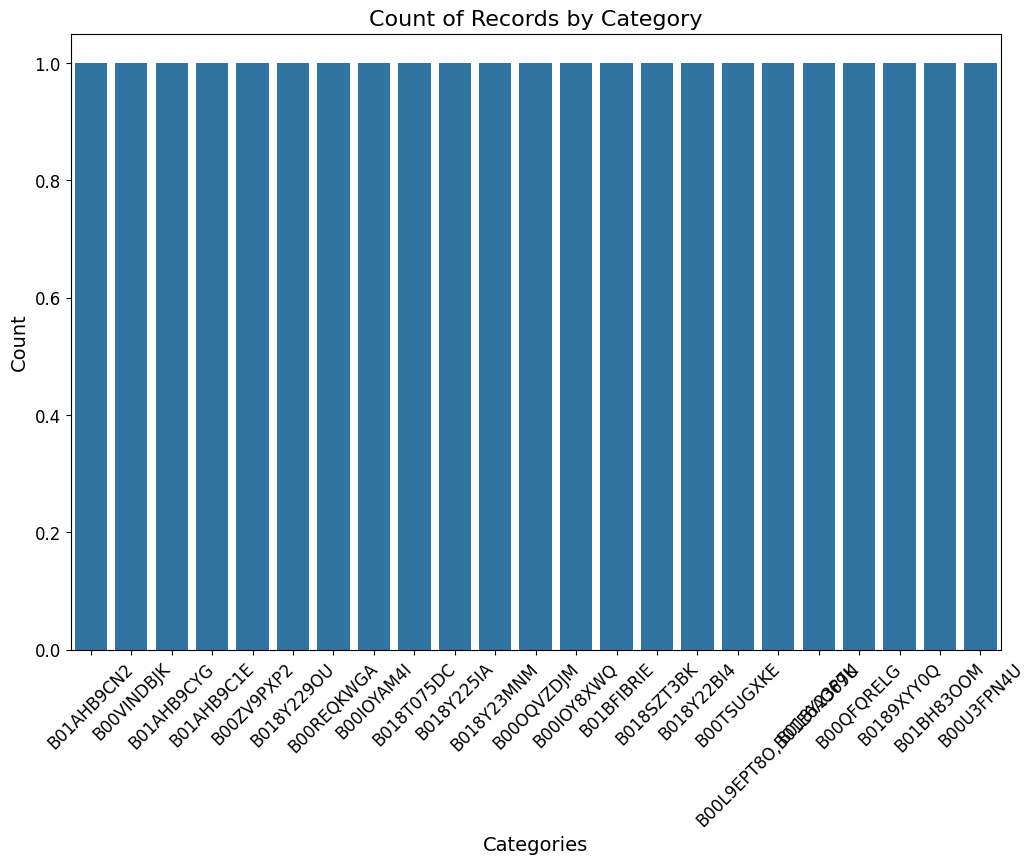

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data' is your merged dataset


# Visualization 1: Bar plot of counts by category
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
sns.countplot(x='Product_ID', data=merged_data)
plt.title('Count of Records by Category', fontsize=16)  # Increase the title font size
plt.xlabel('Categories', fontsize=14)  # Increase the x-axis label font size
plt.ylabel('Count', fontsize=14)  # Increase the y-axis label font size
plt.xticks(fontsize=12, rotation=45)  # Increase x-axis tick label font size and rotate labels for better visibility
plt.yticks(fontsize=12)  # Increase y-axis tick label font size
plt.show()



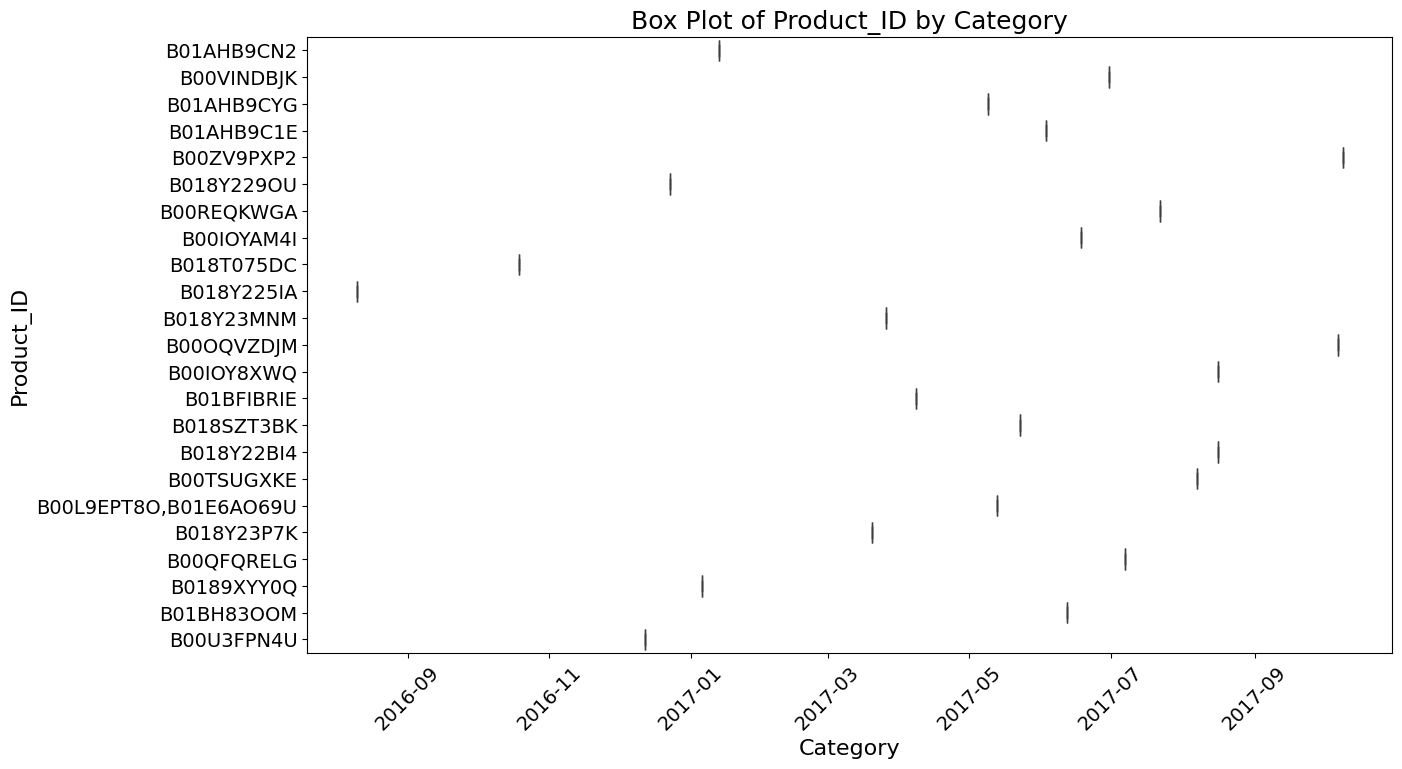

In [53]:
# Visualization 3: Box plot to show the distribution of a numeric column by category
plt.figure(figsize=(14, 8))  # Increase the figure size for better visibility
sns.boxplot(x='Reviews_Date', y='Product_ID', data=merged_data)
plt.title('Box Plot of Product_ID by Category', fontsize=18)  # Increase the title font size
plt.xlabel('Category', fontsize=16)  # Increase the x-axis label font size
plt.ylabel('Product_ID', fontsize=16)  # Increase the y-axis label font size
plt.xticks(fontsize=14, rotation=45)  # Increase x-axis tick label font size and rotate labels for better visibility
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.show()



In [ ]:
"""
In this project, I worked on merging and cleansing data from three 
tables—flat, web, and api—stored in an SQLite database named finalproject.db.
I used the pandas library to merge the datasets based on a common column, 
'Product_ID,' and stored the resulting dataset back into the database.

Throughout the process, I encountered challenges related to the structure and 
content of the data. Initially, an empty DataFrame after merging led me to 
investigate potential issues such as inconsistent data types, missing values,
and common column existence across the tables. I adjusted the merging approach 
and verified the uniqueness and data types of the joining columns, resolving the 
issue and obtaining a meaningful merged dataset.

Throughout the project, I learned the importance of thorough data exploration and
cleansing. Handling discrepancies in data types, missing values, and ensuring a 
common key for merging were critical steps in achieving meaningful visualizations. 
Additionally, I developed an appreciation for the ethical considerations in data 
cleansing. It is crucial to maintain data privacy, transparency, and fairness, 
especially when dealing with sensitive information that can impact individuals or communities.

In conclusion, this project reinforced the significance of data preprocessing and 
visualization in deriving meaningful insights. The iterative process of exploring, 
cleansing, and visualizing data is essential for effective decision-making and understanding
the underlying patterns within complex datasets.
"""